In [8]:
import glob
import numpy
import pandas
import pickle

In [9]:
with open('../Data/PlayerFeaturesTable_02_29_2016.pickle', 'rb') as handle:
    players = allplayerFeaturesTable = pickle.load(handle)

In [10]:
players.head()

,fullName,Player_ID,Team,position1,NumGames,AvgFanPTs,AvgPTS,AvgMIN,AvgFGM,AvgFGA,...,AvgSTL,AvgTOV,AvgPLUS_MINUS,NumDouBL,NumTriBL,Last3GameAvgFanPTs,Last6GameAvgFanPTs,Last3GameAvgMIN,Last3GameAvgPTS,Rank
0,Nate Robinson,101126,NOP,PG,2,4.000000,0.000000,11.500000,0.000000,0.500000,...,0.500000,0.000000,-10.000000,0,0,4.000000,4.000000,11.500000,0.000000,benchPlayer
1,Timofey Mozgov,202389,CLE,C,56,14.223214,6.357143,17.821429,2.732143,4.982143,...,0.285714,0.964286,0.214286,1,0,15.500000,17.750000,21.333333,7.666667,belowAvg
2,Alonzo Gee,202087,NOP,SF,58,11.012931,3.827586,21.448276,1.534483,3.172414,...,0.896552,0.637931,-2.517241,0,0,10.500000,7.583333,20.333333,4.333333,belowAvg
3,Steve Blake,2581,DET,PG,36,11.430556,4.277778,16.000000,1.527778,3.944444,...,0.416667,1.500000,-1.138889,0,0,12.750000,10.375000,16.333333,1.666667,belowAvg
4,Jimmy Butler,202710,CHI,SG,48,39.682292,22.375000,37.812500,7.437500,16.250000,...,1.687500,1.979167,0.187500,6,0,39.833333,39.125000,37.666667,21.333333,advanced


In [11]:
pastwinners = pandas.read_csv('../Scraping/NumberFire/numberFireBestTeam.csv')
# strip '$' from Salary, convert to integer
pastwinners['Salary'] = pastwinners['Salary'].map(lambda ele: int(ele.replace('$', '')))

In [98]:
pastwinners.shape

(528, 12)

In [116]:
pastwinners.head()

,Date,PlayerName,Position,Salary,Pts,R,A,S,T,B,FP,fullName
0,11-17-15,Hassan Whiteside (MIA),C,8100,22,14,0,0,4,10,62,Hassan Whiteside
1,11-17-15,Reggie Jackson (DET),PG,7700,23,6,12,1,5,0,50,Reggie Jackson
2,11-17-15,Brook Lopez (BKN),C,7100,24,10,1,1,1,3,47,Brook Lopez
3,11-17-15,Kemba Walker (CHA),PG,6400,31,4,1,3,1,1,46,Kemba Walker
4,11-17-15,Danilo Gallinari (DEN),SF,6200,32,8,8,0,3,0,55,Danilo Gallinari


In [118]:
pastwinners['Position'].unique()

array(['C', 'PG', 'SF', 'PF', 'SG', 'pg', 'sf'], dtype=object)

In [128]:
pastwinners['Position'] = pastwinners['Position'].map(lambda x: x.upper())

In [50]:
pastwinners['fullName'] = pastwinners.PlayerName.map(lambda x: x.split(' (')[0].replace('.',''))

In [130]:
# split past winners by date
gb = pastwinners.groupby('Date')
groups = [gb.get_group(x) for x in gb.groups]

In [131]:
df = pandas.DataFrame()

for row_num in range(0, len(groups)):
    position_counts = groups[row_num]['Position'].value_counts(sort=True)
    date = groups[row_num]['Date'].unique()
    lineup = pandas.Series(date).append(position_counts)
    df[row_num] = lineup

df = df.transpose()
df.columns = ['Date', 'PG', 'PF', 'C', 'SG', 'SF']

In [132]:
df.Date = pandas.to_datetime(df.Date)

In [133]:
df.set_index('Date',inplace=True)

In [134]:
df.sort_index(inplace=True)

In [136]:
df.head(10)

,PG,PF,C,SG,SF
Date,,,,,
2015-11-17,2,2,2,1,1
2015-11-19,2,2,1,2,1
2015-11-22,2,2,2,1,1
2015-11-23,3,2,1,1,1
2015-11-24,1,1,1,2,3
2015-11-30,2,2,2,1,1
2015-12-01,2,2,2,1,1
2015-12-02,3,1,1,1,2
2015-12-03,2,1,1,2,2


In [137]:
tt = pandas.DataFrame(df.sum()).transpose()

In [138]:
tt = pandas.melt(tt,value_name='Frequency',var_name='Position')

# Insights

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [91]:
sns.set_style("whitegrid")

###What is the position to be mostly selected in the past winning Lineups?

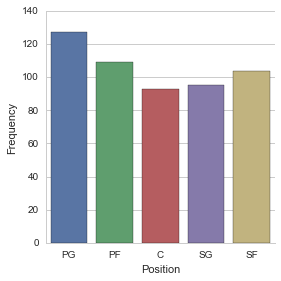

In [139]:
sns.factorplot(x="Position", y='Frequency',data=tt,kind='bar')

Note that there are 8 roster positions are: PG, SG, SF, PF, C, G, F, and UTIL. So, from the graph, choosing PG in the 'UTIL' slot can be more favorable. 

###Relationship between Salary and Position

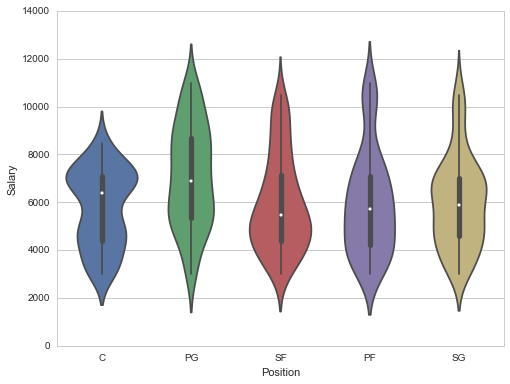

In [140]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Position", y="Salary", data=pastwinners)

###What levels of players are mostly selected?

Based on our categorization(top, advanced, average, belowaverage, benchplayer),
we are interested in how players in best lineups are distributed across our categorized levels. This would give us some insights how to choose our sampling data for training and testing.

Data cleaning for collect matching due to usconsistent names

In [69]:
players.ix[players.fullName=='Ish Smith','fullName']='Ishmael Smith'

In [70]:
players.ix[players.fullName=='J.R. Smith','fullName']='JR Smith'

In [72]:
players.ix[players.fullName=='Lou Williams','fullName']='Louis Williams'

In [74]:
players.ix[players.fullName=='Larry Nance Jr.','fullName']='Larry Nance Jr'

In [75]:
playranks = players[['fullName','Rank']].set_index('fullName')

In [76]:
pastwinners_wrank = pastwinners.join(playranks,on='fullName')

In [78]:
pastwinners_wrank[['Rank']].apply(lambda x: sum(x.isnull())) #all correct matches

Rank    0
dtype: int64

#####Relationship between Salary cost and Rank

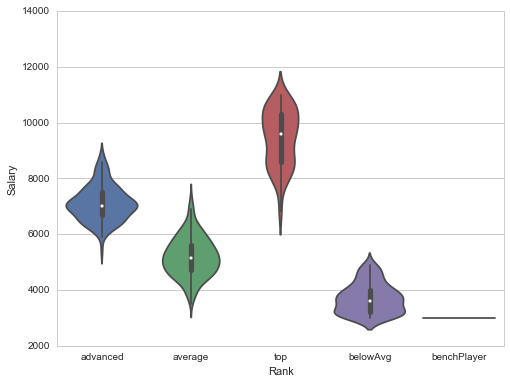

In [110]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Rank", y="Salary", data=pastwinners_wrank)

In [84]:
gb_wrank = pastwinners_wrank.groupby('Date')
groups = [gb_wrank.get_group(x) for x in gb_wrank.groups]
rank_df = pandas.DataFrame()

for row_num in range(len(groups)):
    rank_counts = groups[row_num]['Rank'].value_counts(sort=True)
    date = groups[row_num]['Date'].unique()
    lineup = pandas.Series(date).append(rank_counts)
    rank_df[row_num] = lineup

rank_df = rank_df.transpose()
rank_df.columns = ['Date', 'Average', 'Top', 'BelowAvg', 'Advanced']

In [87]:
rank_df.Date = pandas.to_datetime(rank_df.Date)
rank_df.set_index('Date',inplace=True)
rank_df.sort_index(inplace=True)

In [111]:
rank_df.head(5)

,Average,Top,BelowAvg,Advanced
Date,,,,
2015-11-17,3,NaN,NaN,6
2015-11-19,1,2,2,3
2015-11-22,4,2,2,1
2015-11-23,2,1,1,4
2015-11-24,3,2,2,1


In [89]:
ttt = pandas.DataFrame(rank_df.sum()).transpose()
ttt = pandas.melt(ttt,value_name='Frequency',var_name='Rank')

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


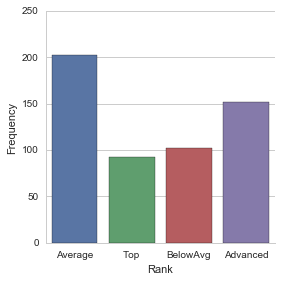

In [92]:
sns.factorplot(x="Rank", y='Frequency',data=ttt,kind='bar')

In [97]:
avgtt = pandas.DataFrame(rank_df.mean()).transpose()
avgtt = pandas.melt(avgtt,value_name='Frequency',var_name='Rank')
avgtt

,Rank,Frequency
0,Average,3.156250
1,Top,1.672727
2,BelowAvg,1.789474
3,Advanced,2.533333


These are great because they give us the insight that we should more focus on selecting the best "seemingly" average(AvgFanPTs: 20~30) and advanced (AvgFanPTs: 30~40)players rather than choosing three top players mixed with belowAvg players. Also, note that there is no benchplayer in best lineups. It means we don't need to pay atttention to those benchplayers and it makes sense. So we won't train our model on the data with benchplayers info. It indeeds help to improve our accuracy.

###What are most popular players to be selected in the winning Lineups?

In [143]:
def plot_most_selected_players(position,pastwinners):
    player_Count_df = pandas.DataFrame(pastwinners_wrank[['PlayerName']].groupby('PlayerName').size(),columns=["Count"]).reset_index()
    winningPlayersByPos = player_Count_df.merge(pastwinners_wrank[['PlayerName','Position','Rank']],how='inner',on='PlayerName')
    winningPlayersByPos.drop_duplicates(inplace=True)
    tmp = winningPlayersByPos[winningPlayersByPos.Position==position].sort_values('Count',ascending=False).head(15)
    g = sns.factorplot(x="PlayerName", y="Count", data=tmp, kind="bar",hue='Rank',size=5,aspect=2) 
    g.set_xticklabels(rotation=90)
    return(tmp)

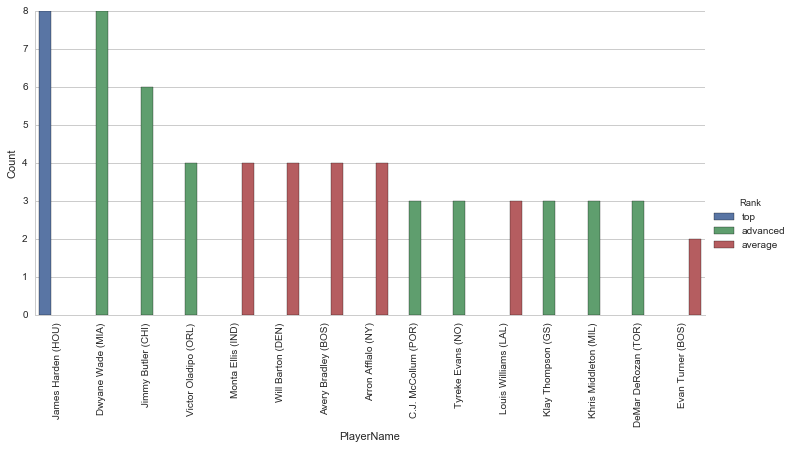

In [144]:
SG_players = plot_most_selected_players('SG',pastwinners)

In [22]:
SG_players.head()

,PlayerName,Count,Position
207,James Harden (HOU),8,SG
136,Dwyane Wade (MIA),8,SG
232,Jimmy Butler (CHI),6,SG
510,Victor Oladipo (ORL),4,SG
381,Monta Ellis (IND),4,SG


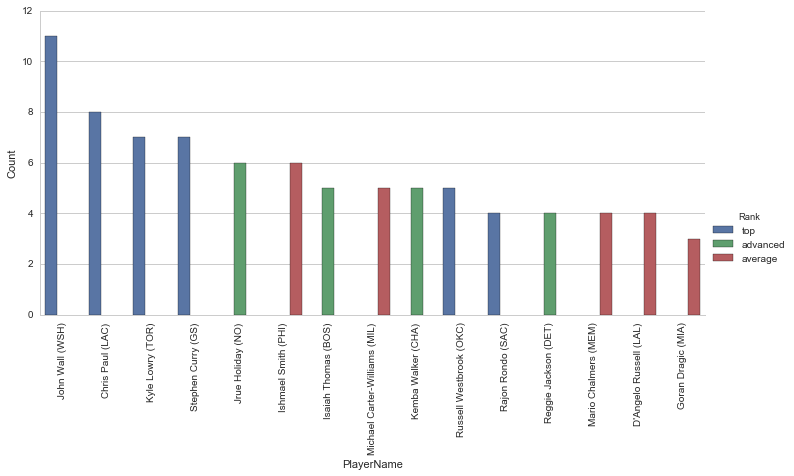

In [146]:
PG_players = plot_most_selected_players('PG',pastwinners)

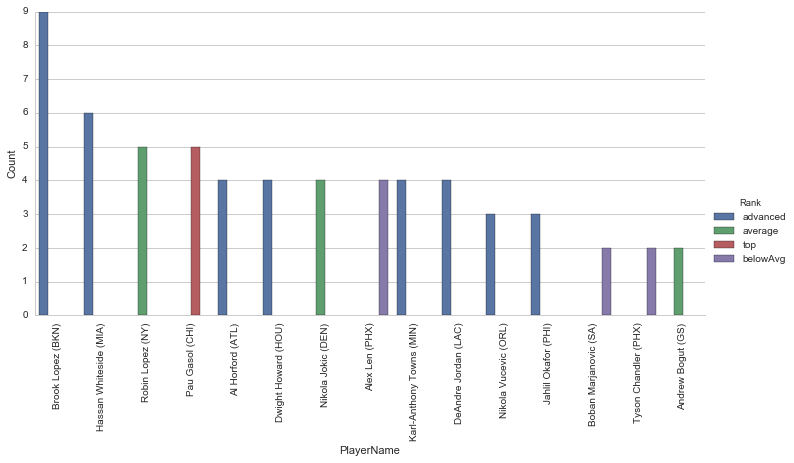

In [147]:
C_players = plot_most_selected_players('C',pastwinners)

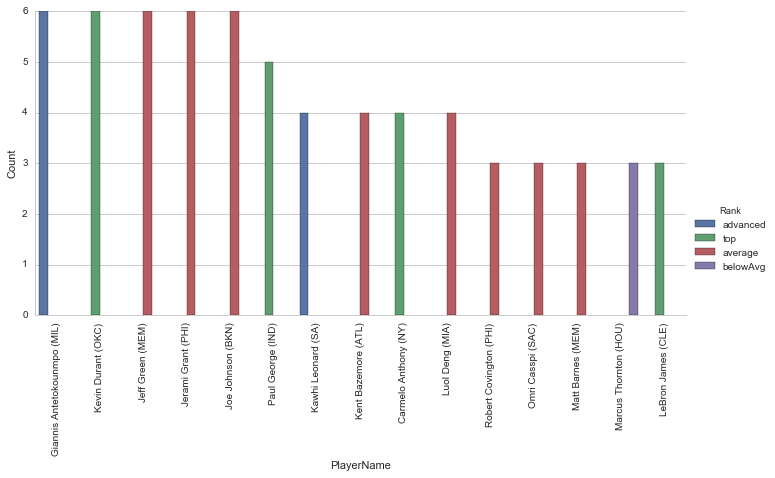

In [148]:
SF_players = plot_most_selected_players('SF',pastwinners)

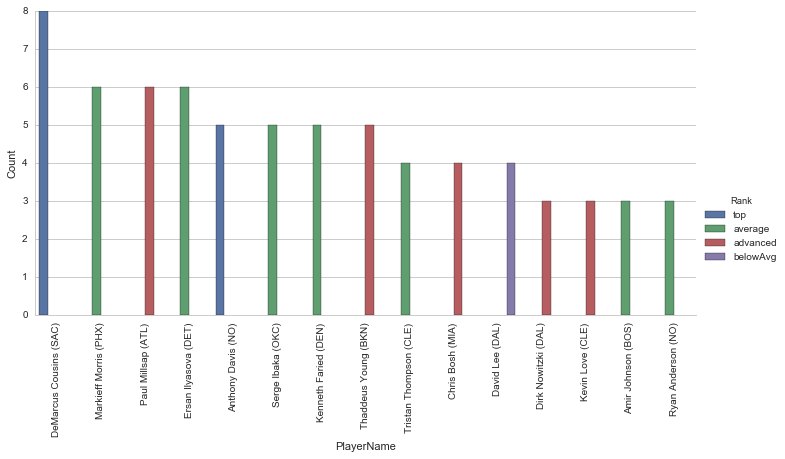

In [149]:
PF_players = plot_most_selected_players('PF',pastwinners)

We can see that which players are more common to occur in the best lineup for each position. So the insight here is that we may not like to bet on the 'C' position too much, while 'PG' and 'PF' are more important in terms of winning odds. We can give more weights for those "proven players" to be selected in our LineUp Optimizer. 

### Pattern of the Fantasy Points and Salary cost for each game day

In [52]:
fpsc_df = pastwinners[['Salary','FP']].reset_index()

In [53]:
fpsc_df.head()

,Date,Salary,FP
0,11-17-15,8100,62
1,11-17-15,7700,50
2,11-17-15,7100,47
3,11-17-15,6400,46
4,11-17-15,6200,55


In [86]:
fpsc_grouped = fpsc_df.groupby('Date')
fpsc_team = fpsc_grouped.apply(lambda x: x[['Salary','FP']].apply(lambda y: y.sum()))
fpsc_team = fpsc_team.rename(columns={'Salary':'TotalSalary','FP':'TotalFanPTs'})

In [87]:
fpsc_team = fpsc_team.set_index(pandas.DatetimeIndex(fpsc_team.index))

In [88]:
fpsc_team.sort_index(inplace=True)

In [89]:
fpsc_team.head()

,TotalSalary,TotalFanPTs
2015-11-17,49900,377.00
2015-11-19,49700,330.75
2015-11-22,49200,375.25
2015-11-23,49000,386.00
2015-11-24,50000,351.50


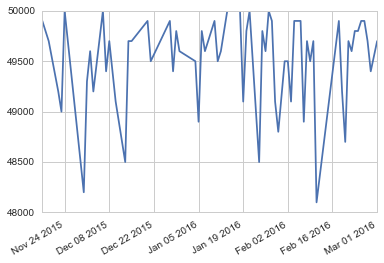

In [98]:
fpsc_team['TotalSalary'].plot()

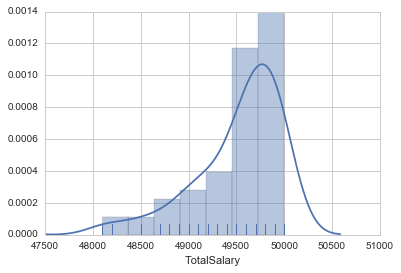

In [99]:
sns.distplot(fpsc_team['TotalSalary'], rug=True)

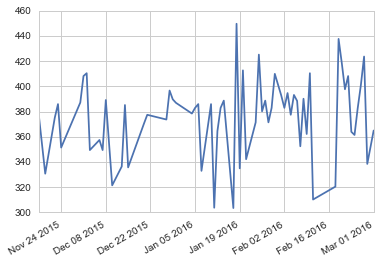

In [101]:
fpsc_team['TotalFanPTs'].plot()

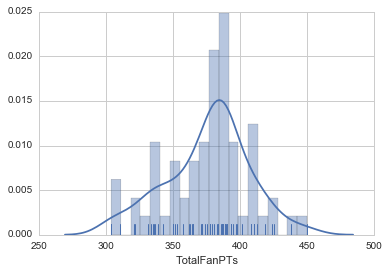

In [105]:
sns.distplot(fpsc_team['TotalFanPTs'],bins=20, rug=True)

We can see the in most cases, the winning Pantasy Points are around 370~400. Thus, we can test our algorithm, if we can optimize our lineup with total Pantasy Points 370~400, we can say we have high odds to be top winners. If we optimize our lineup with total Pantasy Points 340~370, we can say we are likely to be high-tier winners. If we optimize our lineup with total Pantasy Points 300~340, we can say we are likely to be seconde-tier winners. This will give us good sense to evaluate our system. 

###Relationship between Salary cost and Fantasy points

In [ ]:
with open('../Data/PlayerFeaturesTable_02_29_2016.pickle', '2b') as handle:
    players = allplayerFeaturesTable = pickle.load(handle)

In [183]:
from bokeh.plotting import figure, output_notebook, show

In [192]:
from bokeh.models import HoverTool,Circle,ColumnDataSource 

In [191]:
from bokeh.models import Range1d, Plot

In [208]:
output_notebook()

Loading BokehJS ...

In [209]:
hover = HoverTool(
        tooltips=[
            ("Name", "@fullName"),
            ("Position", "@Position"),
            ("Rank", "@Rank"),
        ]
    )

In [210]:
p = figure(tools=[hover], title="Salary V.S Fantasy Points", x_axis_label = "Salary",
       y_axis_label = "Fantasy Points")

In [211]:
rank_Color_map = {'top':'#B46464','advanced':'#AB3967','average':'#463999','belowAvg':'#5AA028','benchPlayer':'#646464'}

In [212]:
pastwinners_wrank['Rank_color'] = pastwinners_wrank.Rank.map(lambda x: rank_Color_map[x])

In [213]:
source = ColumnDataSource(pastwinners_wrank)

In [214]:
p.circle("Salary", "FP", source=source,fill_color='Rank_color',size=9,fill_alpha=0.8,
        line_color='#7c7e71', line_width=0.1, line_alpha=0.5)
p.grid.grid_line_alpha=0.3

In [215]:
show(p)

ImportError: No module named paths